<a href="https://colab.research.google.com/github/nithinreganti/Neighnourhood-Ranking---Third-Estate-Analytics-Buffalo-NY---Capstone-Project/blob/master/Neighbourhood_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neighborhood Ranking - Buffalo,NY | Third Estate Analytics**

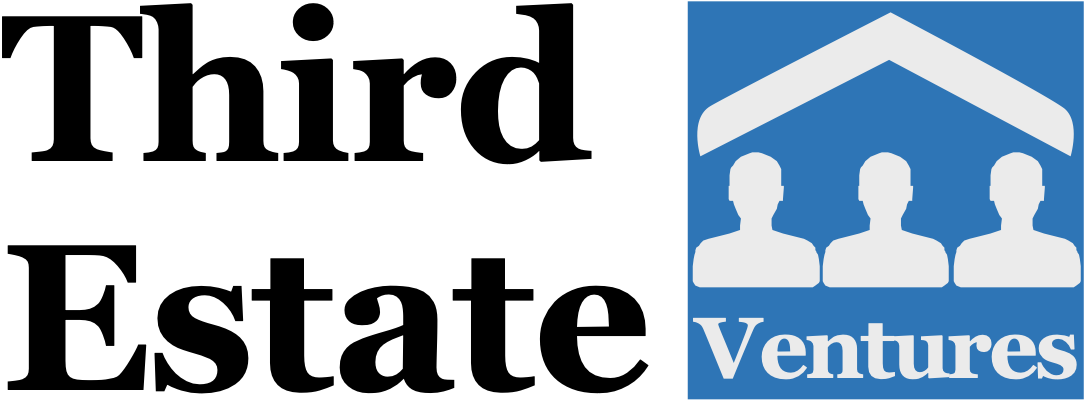

In [14]:
Image(filename="/content/drive/My Drive/Gentrification/logo.jpg", width=1000, height=300)

## Overview about the company 

##### Third estate analytics is a company owned by Third Estate Ventures which is a real estate agency in the Buffalo/Niagara region. The organisation is developing a tool which can be used to suggest neighborhoods based on the need and amount of development it had over years. They are interested in investing on the fastest developing regions in all the similar sized cities.  

## Problem statement 

The client is intrested in investing in the regions which might develop in the forthcoming years. The overall idea of the project is to build a model which can determine the ranking of all the neighborhoods across the Buffalo in order of development over years .The broader scope of the project is to run the model across all the similar sized cities across the US . 

***Dataset*** : To achieve the above goal the datasets are being taken from Open data portal of Buffalo .
URL : https://data.buffalony.gov/
The datasets considered are :
1. Tows 
2. Parking Violations
3. Crime incidents
4. Assessment Roll 
5. Housing Violations 

The datasets are mapped against walkscore and assessed value

***Walkscore***:Walk Score measures the walkability of any address using a patented system. Walk Score also measures pedestrian friendliness by analyzing population density and road metrics such as block length and intersection density

**Assessed Value**:An assessed value is the dollar value assigned to a property to measure applicable taxes. Assessed valuation determines the value of a residence for tax purposes and takes comparable home sales and inspections into consideration

**Libraries Used**: Pandas,numpy,seaborn,matplotlib,scipy,sklearn,tensorflow

**Machine Learning Models**

Decision Tree Regressor

Random Forest Regressor

Gradient boosting Regressor

Importing the required libaries for Exploratory data analysis and Machine learning

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import GradientBoostingRegressor
from google.colab import files
from IPython.display import Image

Mounting the google drive to google colab notebook

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Connecting and using GPU 

In [15]:
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

Reading the parking summonses data from google drive 

Years considered - (2008 - 2019)

In [0]:
parking_summonses=pd.read_csv('/content/drive/My Drive/Gentrification/Parking_Summonses .csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
parking_summonses['CENSUS TRACT'].value_counts()

165      222531
165.0    102745
68       101603
169       60707
63.01     54966
          ...  
44.02       552
46.02       199
46.02        55
62.01        19
62.01        12
Name: CENSUS TRACT, Length: 159, dtype: int64

In [0]:
parking_summonses.shape

(2155859, 18)

Reading the census tracts and corresponding neigborhood data from google drive

In [0]:
tracts_data=pd.read_csv('/content/drive/My Drive/Gentrification/NEighborhoods and tracts.csv')

In [0]:
parking_summonses['CENSUS TRACT'] = pd.to_numeric(parking_summonses['CENSUS TRACT'], errors='coerce')
parking_summonses = parking_summonses.dropna(subset=['CENSUS TRACT'])
parking_summonses['CENSUS TRACT']=parking_summonses['CENSUS TRACT'].astype(float)

In [0]:
tracts_data['CENSUS TRACT'] = pd.to_numeric(tracts_data['CENSUS TRACT'], errors='coerce')
tracts_data = tracts_data.dropna(subset=['CENSUS TRACT'])
tracts_data['CENSUS TRACT']=tracts_data['CENSUS TRACT'].astype(float)

Reading the Neighborhood and corresponding walkscore data from google drive

In [0]:
score=pd.read_excel('/content/drive/My Drive/Gentrification/Walkscore_final.xlsx')

In [0]:
score.columns

Index(['NEIGHBORHOOD', 'WALKSCORE', 'RANK', 'GENTRIFICATION SCORE',
       'CLASSIFCATION ', 'CLASS'],
      dtype='object')

Mapping the corresponding Parking violations to the respective neighborhoods using the common attribute(Census Tract)

In [0]:
final=parking_summonses.merge(tracts_data,on='CENSUS TRACT')

Mapping the corresponding Neighborhood with the Walkscore using the common attribute of both tables (Neighborhood)

In [0]:
parking_final_1=final.merge(score,on='NEIGHBORHOOD')

Sample data frame after merging all the three tables
1. Parking Summonses
2. Neighborhoods and tracts
3. Neighborhoods and Walkscores

In [0]:
parking_final_1.head()

,SUMMONS NUMBER,SUMMONS DATE,VIOLATION TIME,VIOLATION DESCRIPTION,ORIGINAL FINE,VIOLATION ADDRESS NUMBER,VIOLATION STREET,VIOLATION FULL ADDRESS,CITY,STATE,LATITUDE,LONGITUDE,LOCATION,COUNCIL DISTRICT,POLICE DISTRICT,CENSUS TRACT,CENSUS BLOCK GROUP,CENSUS BLOCK,NEIGHBORHOOD,WALKSCORE,RANK,GENTRIFICATION SCORE,CLASSIFCATION,CLASS
0,X2308148,08/02/2019,0125P,PARKING VIOLATION,40.0,175.0,FRANKLIN,175 FRANKLIN,Buffalo,NY,42.888195,-78.875835,"(42.8881947942094, -78.87583500193372)",ELLICOTT,District B,165.0,1,1028,Central,55,36,65,25,D
1,X2308149,08/02/2019,0130P,NO STANDING,40.0,37.0,HURON WEST,37 HURON WEST,Buffalo,NY,42.888948,-78.874872,"(42.88894814599496, -78.87487202385579)",ELLICOTT,District B,165.0,1,1022,Central,55,36,65,25,D
2,X2308151,08/02/2019,0305P,METER OVERTIME,40.0,228.0,FRANKLIN,228 FRANKLIN,Buffalo,NY,42.890040,-78.875395,"(42.89003992129964, -78.87539503306608)",ELLICOTT,District B,165.0,1,1023,Central,55,36,65,25,D
3,X2308152,08/02/2019,0312P,METER OVERTIME,40.0,210.0,FRANKLIN,210 FRANKLIN,Buffalo,NY,42.889319,-78.875628,"(42.88931932925486, -78.87562789846032)",ELLICOTT,District B,165.0,1,1023,Central,55,36,65,25,D
4,X2308153,08/02/2019,0320P,METER OVERTIME,40.0,22.0,SENECA WEST,22 SENECA WEST,Buffalo,NY,42.880596,-78.875566,"(42.880595539253534, -78.87556606949188)",FILLMORE,District B,165.0,1,1114,Central,55,36,65,25,D


Displaying the number of violations in each neighborhood over the years 

In [0]:
parking_final_1['NEIGHBORHOOD'].value_counts()

Elmwood Bidwell       354553
Central               325276
Elmwood Bryant        208101
Fruit Belt            193712
North Park            162378
Allentown             153824
Broadway Fillmore     131946
Lower West Side       120374
University Heights     84124
Masten Park            81852
Seneca-Cazenovia       79536
West Side              72960
South Park             69489
Upper West Side        68069
Hamlin Park            67342
Parkside               66049
Central Park           55958
First Ward             46748
Kenfield               44992
Black Rock             43344
Kensington-Bailey      42517
Fillmore-Leroy         40713
Lovejoy                38723
Riverside              38019
Genesee-Moselle        31553
Schiller Park          28356
Hopkins-Tifft          22245
Grant-Amherst          21113
Seneca Babcock         19906
Kaisertown             19769
Delavan Grider         18925
Pratt-Willert          17163
MLK Park               15597
Ellicott               15281
West Hertel   

In [0]:
parking_final_1['CENSUS TRACT'].value_counts()

165.00    325276
31.00     252786
68.00     153824
63.01      98509
71.02      92218
           ...  
28.00       4983
14.02       4569
29.00       4303
15.00       3216
39.01       2091
Name: CENSUS TRACT, Length: 76, dtype: int64

In [0]:
parking_final_1.dropna()

,SUMMONS NUMBER,SUMMONS DATE,VIOLATION TIME,VIOLATION DESCRIPTION,ORIGINAL FINE,VIOLATION ADDRESS NUMBER,VIOLATION STREET,VIOLATION FULL ADDRESS,CITY,STATE,LATITUDE,LONGITUDE,LOCATION,COUNCIL DISTRICT,POLICE DISTRICT,CENSUS TRACT,CENSUS BLOCK GROUP,CENSUS BLOCK,NEIGHBORHOOD,WALKSCORE,RANK,GENTRIFICATION SCORE,CLASSIFCATION,CLASS
0,X2308148,08/02/2019,0125P,PARKING VIOLATION,40.0,175.0,FRANKLIN,175 FRANKLIN,Buffalo,NY,42.888195,-78.875835,"(42.8881947942094, -78.87583500193372)",ELLICOTT,District B,165.0,1,1028,Central,55,36,65,25,D
1,X2308149,08/02/2019,0130P,NO STANDING,40.0,37.0,HURON WEST,37 HURON WEST,Buffalo,NY,42.888948,-78.874872,"(42.88894814599496, -78.87487202385579)",ELLICOTT,District B,165.0,1,1022,Central,55,36,65,25,D
2,X2308151,08/02/2019,0305P,METER OVERTIME,40.0,228.0,FRANKLIN,228 FRANKLIN,Buffalo,NY,42.890040,-78.875395,"(42.89003992129964, -78.87539503306608)",ELLICOTT,District B,165.0,1,1023,Central,55,36,65,25,D
3,X2308152,08/02/2019,0312P,METER OVERTIME,40.0,210.0,FRANKLIN,210 FRANKLIN,Buffalo,NY,42.889319,-78.875628,"(42.88931932925486, -78.87562789846032)",ELLICOTT,District B,165.0,1,1023,Central,55,36,65,25,D
4,X2308153,08/02/2019,0320P,METER OVERTIME,40.0,22.0,SENECA WEST,22 SENECA WEST,Buffalo,NY,42.880596,-78.875566,"(42.880595539253534, -78.87556606949188)",FILLMORE,District B,165.0,1,1114,Central,55,36,65,25,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812642,Z2222894,01/29/2019,0836A,ALTERNATE PARKING,40.0,36.0,GREELEY,36 GREELEY,Buffalo,NY,42.948733,-78.882463,"(42.948732632109, -78.882463304971)",NORTH,District D,56.0,5,5004,West Hertel,73,16,85,75,B
2812643,Z2222895,01/29/2019,0839A,ALTERNATE PARKING,40.0,55.0,HOLMES,55 HOLMES,Buffalo,NY,42.949007,-78.887397,"(42.949006902999, -78.887396920712)",NORTH,District D,56.0,4,4000,West Hertel,73,16,85,75,B
2812644,Z2239935,03/20/2019,1217P,NO PARKING,40.0,44.0,SAYRE,44 SAYRE,Buffalo,NY,42.947758,-78.893552,"(42.94775780857678, -78.89355160442582)",NORTH,District D,56.0,2,2004,West Hertel,73,16,85,75,B
2812645,Z2248919,03/19/2019,0832A,NO PARKING,40.0,152.0,LAWN,152 LAWN,Buffalo,NY,42.949771,-78.887316,"(42.949771006866236, -78.88731610640603)",NORTH,District D,56.0,4,4000,West Hertel,73,16,85,75,B


String manipulations to fetch the years

In [0]:
parking_final_1['SUMMONS DATE']=parking_final_1['SUMMONS DATE'].apply(lambda x:x[6] + x[7] +x[8] +x[9]) 
parking_final_1['SUMMONS DATE']=parking_final_1['SUMMONS DATE'].apply(lambda x:float(x))

Excluding the year 2019 because the dataset is incomplete for 2019 and might lead to wrong conclusions

In [0]:
parking_final_1=parking_final_1[parking_final_1['SUMMONS DATE'] != '2019.0']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(parking_final_1['VIOLATION DESCRIPTION'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   ALTERNATE PARKING  ...  VEHICLE PARKED ON UNPAVED PORTION OR
0                  0  ...                                     0
1                  0  ...                                     0
2                  0  ...                                     0
3                  0  ...                                     0
4                  0  ...                                     0

[5 rows x 39 columns]


In [0]:
parking_final2 = pd.concat([parking_final_1, lb_results_df], axis=1)

print(parking_final2.head())

  SUMMONS NUMBER  ...  VEHICLE PARKED ON UNPAVED PORTION OR
0       X2308148  ...                                     0
1       X2308149  ...                                     0
2       X2308151  ...                                     0
3       X2308152  ...                                     0
4       X2308153  ...                                     0

[5 rows x 63 columns]


In [0]:

lb = LabelBinarizer()
lb_results1 = lb.fit_transform(parking_final2['SUMMONS DATE'])
lb_results_df1 = pd.DataFrame(lb_results1, columns=lb.classes_)

print(lb_results_df.head())

   ALTERNATE PARKING  ...  VEHICLE PARKED ON UNPAVED PORTION OR
0                  0  ...                                     0
1                  0  ...                                     0
2                  0  ...                                     0
3                  0  ...                                     0
4                  0  ...                                     0

[5 rows x 39 columns]


In [0]:
parking_final = pd.concat([parking_final2, lb_results_df1], axis=1)

print(parking_final.head())

  SUMMONS NUMBER  SUMMONS DATE VIOLATION TIME  ... 2017.0  2018.0  2019.0
0       X2308148        2019.0          0125P  ...      0       0       1
1       X2308149        2019.0          0130P  ...      0       0       1
2       X2308151        2019.0          0305P  ...      0       0       1
3       X2308152        2019.0          0312P  ...      0       0       1
4       X2308153        2019.0          0320P  ...      0       0       1

[5 rows x 76 columns]


In [0]:
 parking_final['RANK'].fillna((parking_final['RANK'].mean()),inplace=True)

In [0]:
feature_cols=['ALTERNATE PARKING',
                             'BLOCKED DRIVEWAY (ALL)',
       'BUS RT. NO PARKING 1:30 TO 7:00 AM 11/15-4/1',
                                     'DOUBLE PARKING',
                   'EXPIRED INSPECTION STICKER (ALL)',
                       'EXPIRED REGISTRATION STICKER',
                     'LESS THAN 20 FT FROM CROSSWALK',
                                       'LOADING ZONE',
                                     'METER OVERTIME',
                             'METHOD OF PARKING(ALL)',
                       'NO INSPECTIONS STICKER (ALL)',
             'NO PARK COMMERICAL TRCK ON RESIDENTIAL',
                                         'NO PARKING',
                 'NO PARKING OF HOUSE TRAILERS (ALL)',
                      'NO REGISTRATION STICKER (ALL)',
              'NO REPAIRS IN STREET EXCEPT EMERGENCY',
                                        'NO STANDING',
                                  'NO STOPPING (ALL)',
                                       'NO VIOLATION',
                    'ONE LICENSE PLATE MISSING (ALL)',
                    'PARKED BEYOND POSTED TIME LIMIT',
                         'PARKED IN HANDICAPPED AREA',
              'PARKED LESS THAN 15 FT - FIRE HYDRANT',
                      'PARKED MORE THAN 12"FROM CURB',
                 'PARKED MORE THAN 72 HRS. SAME SPOT',
                      'PARKED ON BRIDGE OR IN SUBWAY',
                           'PARKED ON SIDEWALK (ALL)',
                'PARKED OVER 18 FT FOR MORE THAN ONE',
                   'PARKING IN WRONG DIRECTION (ALL)',
                 'PARKING ON DIVIDED HWYS PROHIBITED',
           'PARKING PROHIBITED IN CONSTRUCTION SITES',
                                  'PARKING VIOLATION',
                      'PARKING WITHOUT CONSENT (ALL)',
                  'PERSISTEN VIOLATORS AND SCOFFLAWS',
                              'SWITCHED PLATES (ALL)',
                                  'UNKNOWN VIOLATION',
               'UNREGISTERED VEH.ON PRIVATE PROPERTY',
                 'VEHICLE BLOCKING HANDICAP CURB CUT',
               'VEHICLE PARKED ON UNPAVED PORTION OR',
                                               2007.0,
                                               2008.0,
                                               2009.0,
                                               2010.0,
                                               2011.0,
                                               2012.0,
                                               2013.0,
                                               2014.0,
                                               2015.0,
                                               2016.0,
                                               2017.0,
                                               2018.0,
                                               2019.0]

In [0]:
X = parking_final[feature_cols] # Features
y = parking_final.RANK

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred,})
df

,Actual,Predicted
952053,1,14.594374
2150132,40,17.838917
1520236,24,16.624840
1568810,24,19.303079
1490843,22,14.526487
...,...,...
2529955,18,16.265856
22932,36,20.038058
2304891,23,20.532279
1951624,27,15.580360


In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.542114967587207
Mean Squared Error: 151.1185791403219
Root Mean Squared Error: 12.293029697365979


In [0]:
parking_final.columns

Index([                              'SUMMONS NUMBER',
                                       'SUMMONS DATE',
                                     'VIOLATION TIME',
                              'VIOLATION DESCRIPTION',
                                      'ORIGINAL FINE',
                           'VIOLATION ADDRESS NUMBER',
                                   'VIOLATION STREET',
                             'VIOLATION FULL ADDRESS',
                                               'CITY',
                                              'STATE',
                                           'LATITUDE',
                                          'LONGITUDE',
                                           'LOCATION',
                                   'COUNCIL DISTRICT',
                                    'POLICE DISTRICT',
                                       'CENSUS TRACT',
                                 'CENSUS BLOCK GROUP',
                                       'CENSUS BLOCK',
          

In [0]:
parking_final['CLASSIFCATION ']

0          25
1          25
2          25
3          25
4          25
           ..
2812642    75
2812643    75
2812644    75
2812645    75
2812646    75
Name: CLASSIFCATION , Length: 2812647, dtype: int64

In [0]:
X1 = parking_final[feature_cols] # Features
y1 = parking_final['CLASS'] 

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:

y1_pred=clf.predict(X1_test)

In [0]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.3774210560621952


Assessment Price

In [0]:
assessment_price=pd.read_csv('/content/drive/My Drive/Gentrification/census_rank_Assessmentprice.csv')

In [0]:
assessment_price['CENSUS TRACT'] = pd.to_numeric(assessment_price['CENSUS TRACT'], errors='coerce')
assessment_price = assessment_price.dropna(subset=['CENSUS TRACT'])
assessment_price['CENSUS TRACT']=assessment_price['CENSUS TRACT'].astype(float)

In [0]:
parking_ranked_assessment=parking_summonses.merge(assessment_price,on='CENSUS TRACT')

In [0]:
parking_ranked_assessment.dropna()

,SUMMONS NUMBER,SUMMONS DATE,VIOLATION TIME,VIOLATION DESCRIPTION,ORIGINAL FINE,VIOLATION ADDRESS NUMBER,VIOLATION STREET,VIOLATION FULL ADDRESS,CITY,STATE,LATITUDE,LONGITUDE,LOCATION,COUNCIL DISTRICT,POLICE DISTRICT,CENSUS TRACT,CENSUS BLOCK GROUP,CENSUS BLOCK,Price/sqft,Rank
0,X2308148,08/02/2019,0125P,PARKING VIOLATION,40.0,175.0,FRANKLIN,175 FRANKLIN,Buffalo,NY,42.888195,-78.875835,"(42.8881947942094, -78.87583500193372)",ELLICOTT,District B,165.0,1,1028,272.117490,2
1,X2308149,08/02/2019,0130P,NO STANDING,40.0,37.0,HURON WEST,37 HURON WEST,Buffalo,NY,42.888948,-78.874872,"(42.88894814599496, -78.87487202385579)",ELLICOTT,District B,165.0,1,1022,272.117490,2
2,X2308151,08/02/2019,0305P,METER OVERTIME,40.0,228.0,FRANKLIN,228 FRANKLIN,Buffalo,NY,42.890040,-78.875395,"(42.89003992129964, -78.87539503306608)",ELLICOTT,District B,165.0,1,1023,272.117490,2
3,X2308152,08/02/2019,0312P,METER OVERTIME,40.0,210.0,FRANKLIN,210 FRANKLIN,Buffalo,NY,42.889319,-78.875628,"(42.88931932925486, -78.87562789846032)",ELLICOTT,District B,165.0,1,1023,272.117490,2
4,X2308153,08/02/2019,0320P,METER OVERTIME,40.0,22.0,SENECA WEST,22 SENECA WEST,Buffalo,NY,42.880596,-78.875566,"(42.880595539253534, -78.87556606949188)",FILLMORE,District B,165.0,1,1114,272.117490,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109939,Y9844732,06/11/2015,1226A,EXPIRED INSPECTION STICKER (ALL),35.0,100.0,HOWARD,100 HOWARD,Buffalo,NY,42.883386,-78.850221,"(42.88338630523, -78.850220902355)",ELLICOTT,District C,15.0,2,2023,24.060547,66
2109940,Y9844733,06/11/2015,1229A,NO PARKING,35.0,165.0,HOWARD,165 HOWARD,Buffalo,NY,42.883285,-78.847895,"(42.883285141776, -78.847894893586)",FILLMORE,District C,15.0,1,1008,24.060547,66
2109941,Y9844734,06/11/2015,1230A,EXPIRED INSPECTION STICKER (ALL),35.0,165.0,HOWARD,165 HOWARD,Buffalo,NY,42.883285,-78.847895,"(42.883285141776, -78.847894893586)",FILLMORE,District C,15.0,1,1008,24.060547,66
2109942,Z9835576,05/14/2015,1106A,ALTERNATE PARKING,30.0,66.0,WATSON,66 WATSON,Buffalo,NY,42.881833,-78.849974,"(42.881833438232, -78.849974179483)",ELLICOTT,District C,15.0,1,1010,24.060547,66


In [0]:
parking_ranked_assessment['SUMMONS DATE']=parking_ranked_assessment['SUMMONS DATE'].apply(lambda x:x[6] + x[7] +x[8] +x[9]) 
parking_ranked_assessment['SUMMONS DATE']=parking_ranked_assessment['SUMMONS DATE'].apply(lambda x:float(x))

In [0]:
parking_ranked_assessment=parking_ranked_assessment[parking_ranked_assessment['SUMMONS DATE'] != '2019']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(parking_ranked_assessment['VIOLATION DESCRIPTION'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   ALTERNATE PARKING  ...  VEHICLE PARKED ON UNPAVED PORTION OR
0                  0  ...                                     0
1                  0  ...                                     0
2                  0  ...                                     0
3                  0  ...                                     0
4                  0  ...                                     0

[5 rows x 39 columns]


In [0]:
parking_final_assessment = pd.concat([parking_ranked_assessment, lb_results_df], axis=1)

print(parking_final_assessment.head())

  SUMMONS NUMBER  ...  VEHICLE PARKED ON UNPAVED PORTION OR
0       X2308148  ...                                     0
1       X2308149  ...                                     0
2       X2308151  ...                                     0
3       X2308152  ...                                     0
4       X2308153  ...                                     0

[5 rows x 59 columns]


In [0]:
feature_cols =['SUMMONS DATE','ALTERNATE PARKING',
       'BLOCKED DRIVEWAY (ALL)',
       'BUS RT. NO PARKING 1:30 TO 7:00 AM 11/15-4/1', 'DOUBLE PARKING',
       'EXPIRED INSPECTION STICKER (ALL)', 'EXPIRED REGISTRATION STICKER',
       'LESS THAN 20 FT FROM CROSSWALK', 'LOADING ZONE', 'METER OVERTIME',
       'METHOD OF PARKING(ALL)', 'NO INSPECTIONS STICKER (ALL)',
       'NO PARK COMMERICAL TRCK ON RESIDENTIAL', 'NO PARKING',
       'NO PARKING OF HOUSE TRAILERS (ALL)', 'NO REGISTRATION STICKER (ALL)',
       'NO REPAIRS IN STREET EXCEPT EMERGENCY', 'NO STANDING',
       'NO STOPPING (ALL)', 'NO VIOLATION', 'ONE LICENSE PLATE MISSING (ALL)',
       'PARKED BEYOND POSTED TIME LIMIT', 'PARKED IN HANDICAPPED AREA',
       'PARKED LESS THAN 15 FT - FIRE HYDRANT',
       'PARKED MORE THAN 12"FROM CURB', 'PARKED MORE THAN 72 HRS. SAME SPOT',
       'PARKED ON BRIDGE OR IN SUBWAY', 'PARKED ON SIDEWALK (ALL)',
       'PARKED OVER 18 FT FOR MORE THAN ONE',
       'PARKING IN WRONG DIRECTION (ALL)',
       'PARKING ON DIVIDED HWYS PROHIBITED',
       'PARKING PROHIBITED IN CONSTRUCTION SITES', 'PARKING VIOLATION',
       'PARKING WITHOUT CONSENT (ALL)', 'PERSISTEN VIOLATORS AND SCOFFLAWS',
       'SWITCHED PLATES (ALL)', 'UNKNOWN VIOLATION',
       'UNREGISTERED VEH.ON PRIVATE PROPERTY',
       'VEHICLE BLOCKING HANDICAP CURB CUT',
       'VEHICLE PARKED ON UNPAVED PORTION OR']

In [0]:
 parking_final_assessment['Rank'].fillna((parking_final_assessment['Rank'].mean()),inplace=True)

In [0]:
X = parking_final_assessment[feature_cols] # Features
y = parking_final_assessment.Rank

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred,})
df

,Actual,Predicted
284683,2,28.166680
1219255,34,30.928944
399622,7,14.971995
1388856,4,12.688517
1582979,13,26.921618
...,...,...
586926,3,26.921618
1757866,14,30.988432
211580,2,27.939208
90944,2,12.688517


In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16.239564983192004
Mean Squared Error: 411.4642491927575
Root Mean Squared Error: 20.28458156316658


In [0]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)

In [0]:
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [0]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import mean_absolute_error
y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

16.587552122931434